# Perceptron


# Q.3


### Importing Libraries


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns


### Data Generation


### Using the make circles function in sklearn generate a dataset of 100 points with two classes.


### Creating a Dataset of Intersecting Circles using Scikit-learn's make_circles() Function


In [13]:
X, y = datasets.make_circles(
    n_samples=100, shuffle=True, noise=0.04, random_state=100, factor=0.8)


In [14]:
print(np.unique(y))


[0 1]


### Change the label for class 0 to -1


In [15]:
y[y == 0] = -1


### Visualize the generated data using scatter plot.


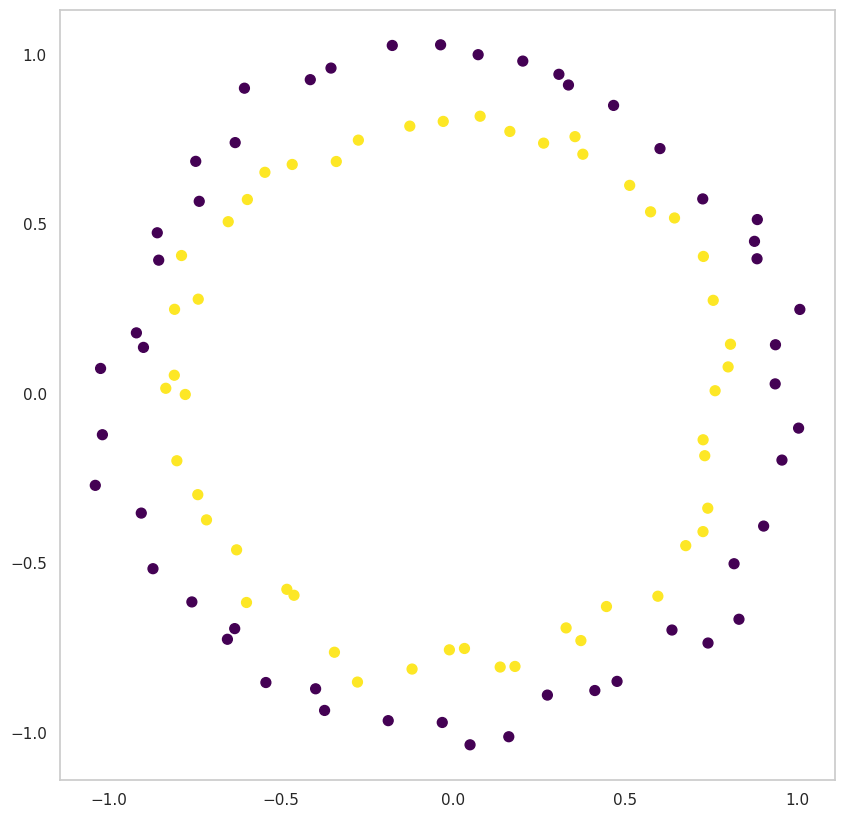

In [16]:
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


## Adding Bias Term: Second Order


### Augmenting the input feature matrix X with additional polynomial features of degree 2.


In [17]:
# Add a column of ones to the beginning of X to represent the bias term
# and create an empty numpy array to hold the augmented features
X_augmented = np.c_[np.ones(len(X)), X,

                    # Append a column representing the square of the first feature
                    X[:, 0] ** 2,

                    # Append a column representing the square of the second feature
                    X[:, 1] ** 2,

                    # Append a column representing the product of the first and second features
                    X[:, 0] * X[:, 1]]


### Printing first few rows of the dataset


In [18]:
X_augmented[:10]


array([[ 1.00000000e+00, -3.11636534e-02, -9.70826653e-01,
         9.71173294e-04,  9.42504390e-01,  3.02545053e-02],
       [ 1.00000000e+00,  7.88966484e-02,  8.17529577e-01,
         6.22468113e-03,  6.68354609e-01,  6.45003436e-02],
       [ 1.00000000e+00, -1.01876430e+00, -1.21954030e-01,
         1.03788070e+00,  1.48727855e-02,  1.24242412e-01],
       [ 1.00000000e+00,  4.12228872e-01, -8.76590205e-01,
         1.69932643e-01,  7.68410388e-01, -3.61355791e-01],
       [ 1.00000000e+00, -3.73087450e-01, -9.35326594e-01,
         1.39194246e-01,  8.74835837e-01,  3.48958614e-01],
       [ 1.00000000e+00, -1.02406631e+00,  7.35191007e-02,
         1.04871180e+00,  5.40505816e-03, -7.52884339e-02],
       [ 1.00000000e+00, -1.88179010e-01, -9.65437315e-01,
         3.54113396e-02,  9.32069209e-01,  1.81675038e-01],
       [ 1.00000000e+00, -5.43639171e-01, -8.52978821e-01,
         2.95543549e-01,  7.27572869e-01,  4.63712699e-01],
       [ 1.00000000e+00, -8.02396644e-01, -1.987

## Perceptron Algorithm


In [19]:
def perceptron(X, y, initial_weights=None, learning_rate=0.1, epochs=1000):
    """
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    # Initialize weights to zero or using provided initial weights
    if initial_weights is None:
        w = np.zeros(X.shape[1])
    else:
        w = initial_weights

    # Initialize empty lists to keep track of errors and weights during training
    errors_list = []
    weights_list = []

    # Loop through the specified number of epochs
    for epoch in range(epochs):
        # Initialize the error count for this epoch to zero
        mismatch = 0

        # Loop through each training example in X and y
        for i, x in enumerate(X):
            # If the prediction is incorrect (i.e., predicted y value has a different sign than the true y value)
            if (np.dot(X[i], w) * y[i]) <= 0:
                # Update the weights using the perceptron update rule
                w = w + learning_rate * X[i] * y[i]
                # Increment the error count for this epoch
                mismatch += 1

        # Add the error count for this epoch to the errors list
        errors_list.append(mismatch)
        # Add the current weights to the weights list
        weights_list.append(w)

        # Print the epoch number and error count every 10 epochs
        if epoch % 10 == 0:
            print(f"Iteration {epoch} with error = {mismatch}")

        # If there are no errors in this epoch, exit the training loop
        if mismatch == 0:
            break

    # Print the final epoch number and error count to the console
    print(f"Iteration {epoch} with error = {mismatch}")

    # Return the list of weights and list of errors over the epochs
    return weights_list, errors_list


### Training a perceptron algorithm on the augmented feature matrix X_aug to classify a binary target variable y


In [20]:
# Use the perceptron function to train a classifier on the augmented features
weights, errors = perceptron(
    X_augmented, y,

    # Initialize the weight vector with the given values
    initial_weights=[-1, -1, -1, -1, -1, 0],

    # Set the learning rate (step size) for the algorithm
    learning_rate=0.1,

    # Set the maximum number of epochs (passes over the data) for the algorithm
    epochs=5000)


eta : 0.1
Iteration 0 with error = 36
Iteration 10 with error = 9
Iteration 14 with error = 0


### Generating a plot to visualize the decision boundary learned by the perceptron algorithm on the dataset


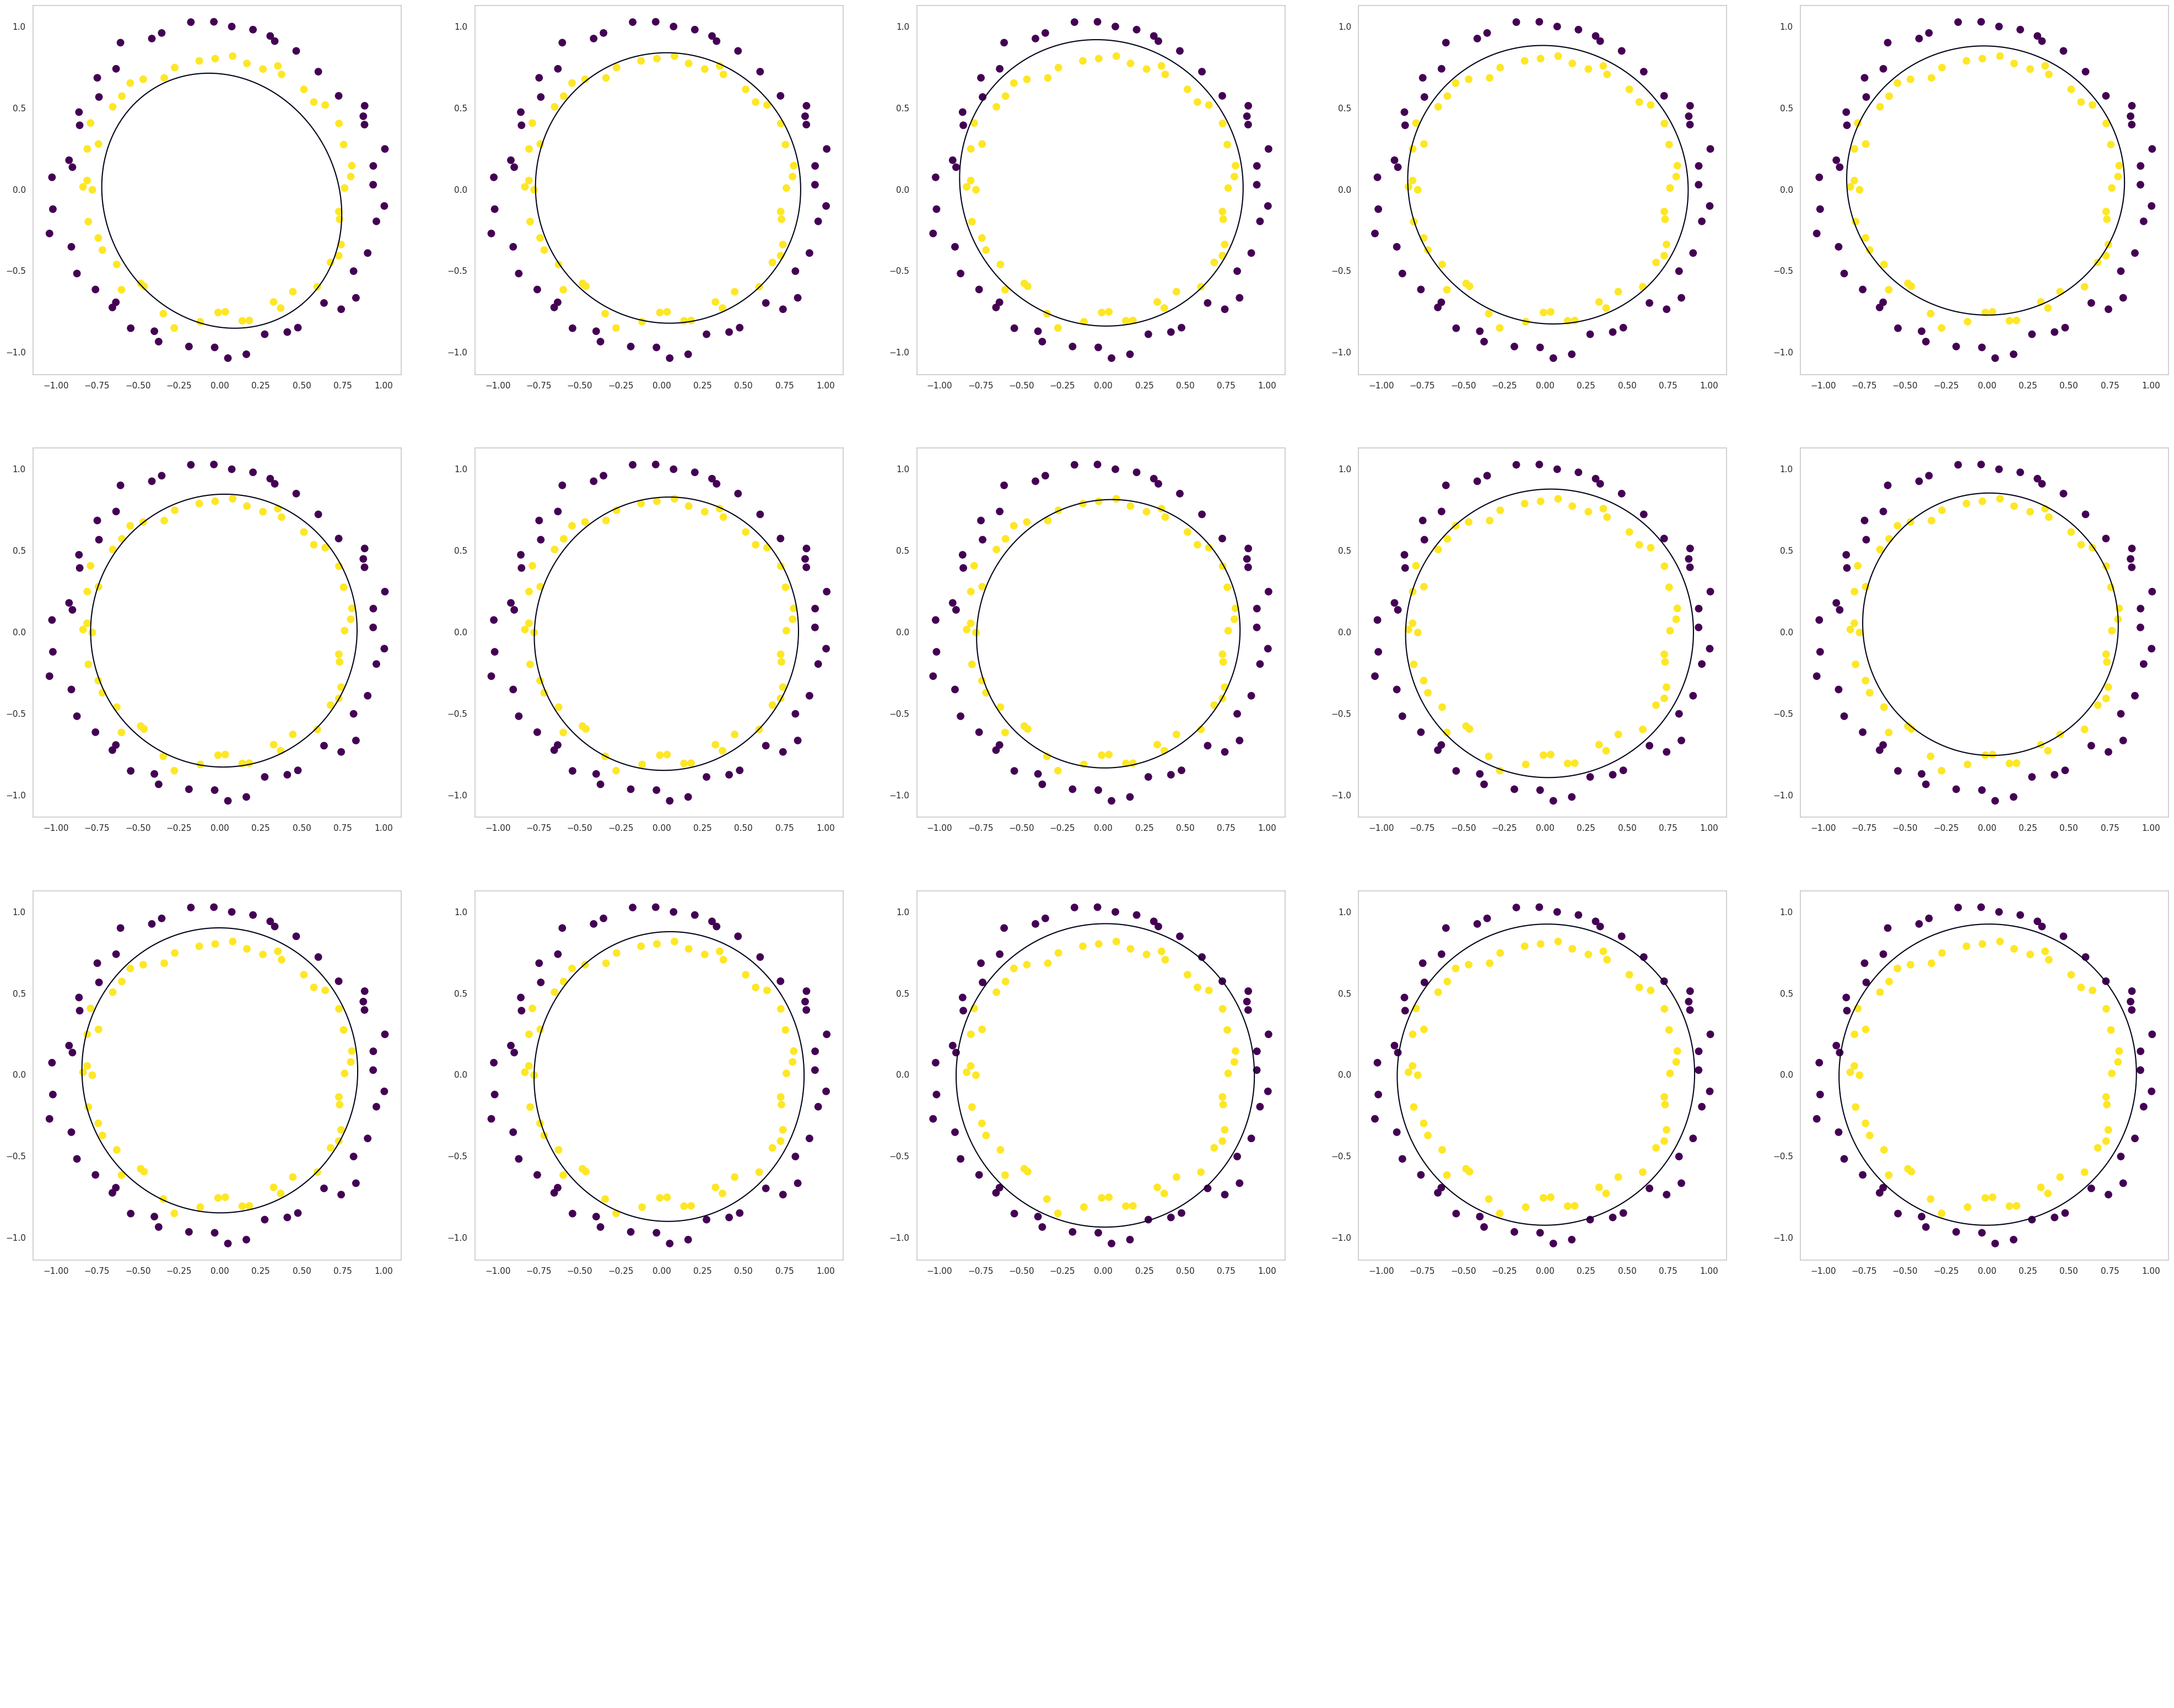

In [21]:
# Generate a grid of points to evaluate the decision boundary
Xs = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
Ys = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
Xs, Ys = np.meshgrid(Xs, Ys)

# Determine the layout of subplots based on the number of weights vectors
columns = 5
rows = len(weights) // columns + 1

# Create a figure and an array of subplots
fig, ax = plt.subplots(rows, columns, figsize=(50, 50*rows/columns))

# Iterate over the weight vectors and plot the corresponding decision boundary
for i in range(len(weights)):
    w = weights[i]

    # Compute the values of the decision boundary on the grid of points
    Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] *
          Xs ** 2 - w[4] * Ys ** 2 - w[5] * Xs * Ys)

    # Plot the decision boundary as a contour plot
    ax[i//columns, i % columns].contour(Xs, Ys, Zs, levels=[0])

    # Plot the training data as scatter points
    ax[i//columns, i %
        columns].scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='viridis')

    # Turn off the grid lines in each subplot
    ax[i//columns, i % columns].grid(False)

# Remove any empty subplots from the layout
for i in range(rows):
    for j in range(columns):
        if ax[i, j].has_data() == False:
            ax[i, j].axis('off')


### Plotting the Final Decision Boundary of the Perceptron Algorithm with the training data


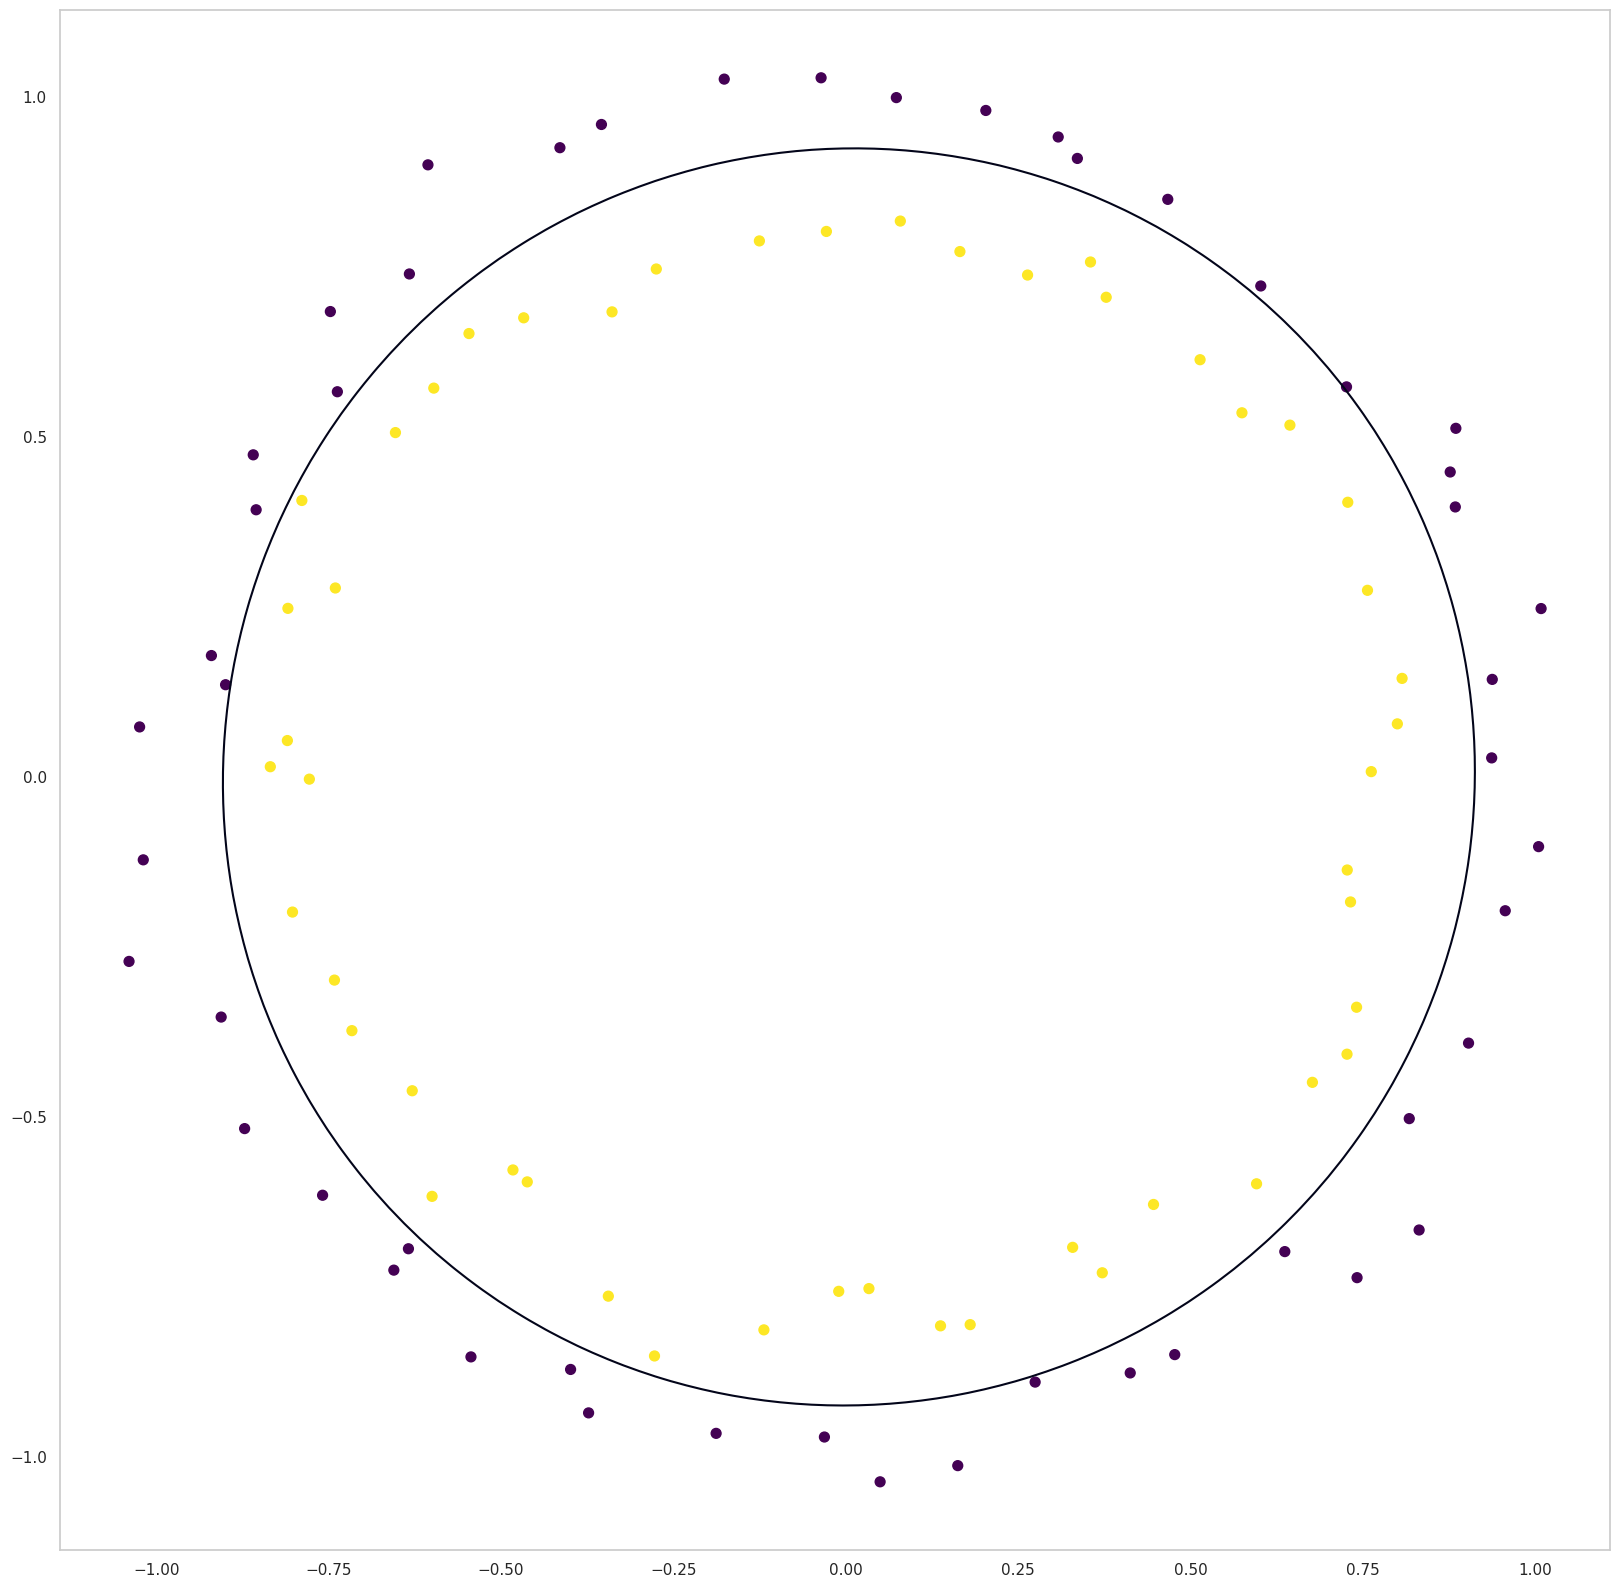

In [22]:
plt.figure(figsize=(20, 20))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
w = weights[-1]
Xs = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
Ys = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
Xs, Ys = np.meshgrid(Xs, Ys)
Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] *
      Xs ** 2 - w[4] * Ys ** 2 - w[5] * Xs * Ys)
plt.contour(Xs, Ys, Zs, levels=[0])
plt.show()
